# Dummy variables or how to deal with categorical predictors

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()

## Load the data

In [2]:
# Load the data from a .csv in the same folder. Since we will do some preprocessing, the variable is not called 'data' just yet!
raw_data = pd.read_csv('1.03. Dummies.csv')

In [3]:
# Let's check what's inside this data frame
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No
6,1764,3.00,No
7,1764,3.00,No
8,1792,3.01,No
9,1850,3.01,No


## Map the data

In [4]:
# Map all 'No' entries with 0, and all 'Yes' entries with 1. Put that in a new variable called 'data'
# Note data is a copy of raw_data, because of how pointers in Python work
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

# Let's see what's inside
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
5,1670,2.91,0
6,1764,3.00,0
7,1764,3.00,0
8,1792,3.01,0
9,1850,3.01,0


In [5]:
# This method gives us very nice descriptive statistics.
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Regression

In [6]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data [['SAT','Attendance']]

In [7]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression.
results.summary()

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 18 Aug 2019   Prob (F-statistic):           2.19e-15
Time:                        12:08:56   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot the regression line(s) on the scatter plot

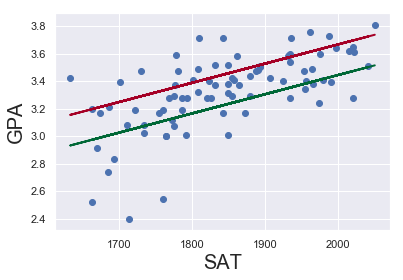

In [8]:
# Create a scatter plot of SAT and GPA
plt.scatter(data['SAT'],y)
# Define the two regression equations, depending on whether they attended (yes), or didn't (no)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
# Plot the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
# Name your axes :)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Plot the regression line(s) on the scatter plot and color the data points

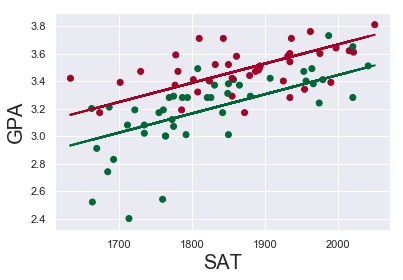

In [9]:
# In this code I want to colour the points depending on attendance
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Attendance' as color, and choose a colour map of your choice
# The colour map we've chosen is completely arbitrary
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

# Plot the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Add the original regression line

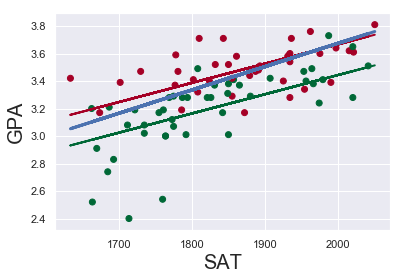

In [10]:
# Same as above, this time we are including the regression line WITHOUT the dummies.

# In this code I want to color the points depending on attendance
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Attendance' as color, and choose a colour map of your choice
# The colour map we've chosen is completely arbitrary
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
# Original regression line
yhat = 0.0017*data['SAT'] + 0.275

# Plot the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837', label ='regression line1')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026', label ='regression line2')
# Plot the original regression line
fig = plt.plot(data['SAT'],yhat, lw=3, c='#4C72B0', label ='regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# How to make predictions based on the regressions we create

In [16]:
# Let's see what's inside the independent variable. 
# The first column comes from the 'add_constant' method. It's only 1s, told ya! 
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
5,1.0,1670,0
6,1.0,1764,0
7,1.0,1764,0
8,1.0,1792,0
9,1.0,1850,0


In [17]:
# Create a new data frame, identical in organization to X.
# The constant is always 1, while each of the lines corresponds to an observation (student)
new_data = pd.DataFrame({'const': 1,'SAT': [1700, 1670], 'Attendance': [0, 1]})
# By default, when you create a df (not load, but create), the columns are sorted alphabetically
# So if we don't reorder them, they would be 'Attendance', 'const', 'SAT'
# If you feed them in the wrong order, you will get wrong results!
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [18]:
# I am renaming the indices for the purposes of this example.
# That's by not really a good practice => I won't overwrite the variable.
# If I want to use NumPy, sklearn, etc. methods on a df with renamed indices, they will simply be lost
# and returned to 0,1,2,3, etc.
new_data.rename(index={0: 'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [19]:
# Use the predict method on the regression with the new data as a single argument
predictions = results.predict(new_data)
# The result
predictions

0    3.023513
1    3.204163
dtype: float64

In [20]:
# If we want we can create a data frame, including everything
predictionsdf = pd.DataFrame({'Predictions':predictions})
# Join the two data frames
joined = new_data.join(predictionsdf)
# Rename the indices as before (not a good practice in general) 
joined.rename(index={0: 'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
